# Anomaly Detection from a Data Stream

### Required library import.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

### Defining a class for anomaly.

In [24]:
class AnomalyDetector:
    def __init__(self, threshold=3.0, seasonality=10, window_size=50):
        self.threshold = threshold
        self.seasonality = seasonality
        self.window_size = window_size
        self.data_buffer = []
        self.data_distribution = []

    def update_distribution(self):
        if len(self.data_buffer) >= self.window_size:
            window_data = self.data_buffer[-self.window_size:]
            mean = np.mean(window_data)
            std_dev = np.std(window_data)
            self.data_distribution = {'mean': mean, 'std_dev': std_dev}

    def detect_anomaly(self, data_point):
        if len(self.data_distribution) == 0:
            return False

        z_score = np.abs((data_point - self.data_distribution['mean']) / self.data_distribution['std_dev'])
        return z_score > self.threshold

### Generate data stream

In [25]:
def simulate_data_stream(num_points, anomaly_index):
    np.random.seed(42)
    data_stream = []

    for i in range(num_points):
        if i == anomaly_index:
            # Introduce an anomaly
            data_point = np.random.normal(loc=100, scale=20)
        else:
            # Simulate normal data with seasonality and noise
            data_point = 50 + 10 * np.sin(i / 10) + np.random.normal(loc=0, scale=5)

        data_stream.append(data_point)

    return data_stream

### Main function

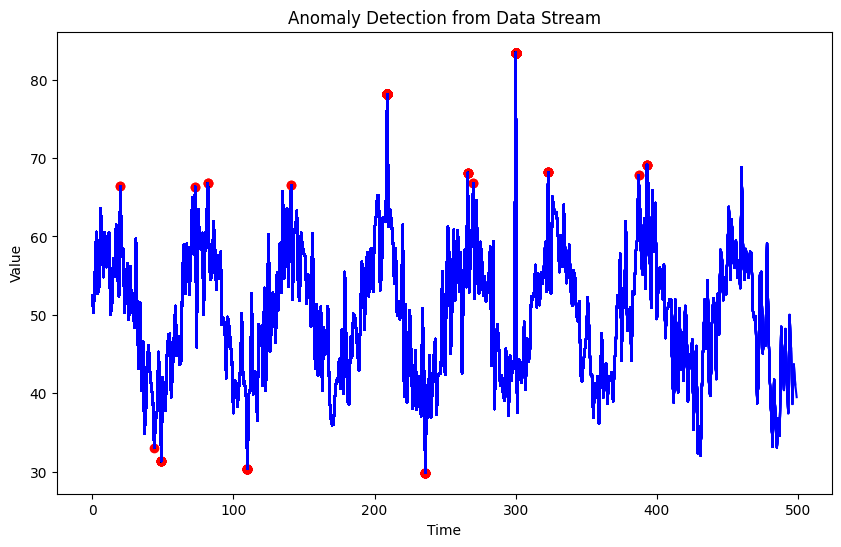

In [30]:
def main():
    detector = AnomalyDetector(threshold=3.0, seasonality=10, window_size=50)

    data_stream = simulate_data_stream(num_points=500, anomaly_index=300)

    fig, ax = plt.subplots(figsize=(10, 6))
    plt.title('Anomaly Detection from Data Stream')
    plt.xlabel('Time')
    plt.ylabel('Value')

    for i, data_point in enumerate(data_stream):
        detector.data_buffer.append(data_point)
        detector.update_distribution()

        anomalies = [j for j, point in enumerate(data_stream[:i + 1]) if detector.detect_anomaly(point)]
        if anomalies:
            ax.scatter(anomalies, [data_stream[j] for j in anomalies], color='red', label='Anomaly')


        ax.plot(data_stream[:i + 1], color='blue', label='Data Stream')
        display(fig)
        clear_output(wait=True)
        time.sleep(0.05)

    # plt.show()

if __name__ == "__main__":
    main()
